# AiDM 2019 Group 26: Assignment 3: Structure of Wikipedia Links


## Part 4: Implement PageRank algorithm from slide 18

Auke Bruinsma, s1594443 and Simon van Wageningen, s2317079.

**Instructions slide 25**:

- Store both $M$ and $v_{old}$ and $v_{new}$ (in RAM).
- Implement the algorithm from slide 18. Run 25 iterations of this algorithm with $\beta = 0.8$.
- Plot the MSE of the differences (25 numbers): $v$ - $Mv$
- How much time is needed to run a single iteration?
- Have you obtained similar/identical results as in the previous task? What might be the source of eventual differences? 

### 1. Imports.

In [1]:
# Packages.
import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt
from scipy.sparse import csc_matrix

In [2]:
# Datasets
data = pd.read_csv("preprocessed_data.csv",sep = ",",)
data = data.astype(int)

### 2. Create the transition matrix $M$ and pagerank vector $v$.

In [3]:
M_ones = csc_matrix((np.ones(len(data)),(data['page_id_to'],data['page_id_from'])), dtype = int) # Transition matrix with 1's.
c = np.reshape(np.asarray(M_ones.sum(axis=0)),np.shape(M_ones)[0]) # Find the sum so that you can divide columns.
c[c==0]=1 # So you do not divide by zero but the column stays the same.
M = M_ones.multiply(1/c) # Divide columns by the sum of the columns (equal weights).
v_old = np.full(shape=np.shape(M)[1],fill_value=1/np.shape(M_ones)[1]) # Initialise page vector v.

Instead of having a sparse matrix representation of the transition matrix $M$, we want to represent the data using 'inverted indexing', as a list of <node, outdegree, children of the node> (encoded sparse matrix representation).

In [4]:
source_nodes_list = list(np.arange(np.shape(M_ones)[1], dtype = int)) # List with all the source nodes.
degree_list = [0] * np.shape(M_ones)[1] # List with all the degrees.
dest_nodes_list = [0] * np.shape(M_ones)[1] # List with all the destination nodes.

for i in range(np.shape(M_ones)[1]): # Loop over the columns in the transition matrix ...
    col = M_ones.getcol(i) # ... in order to get a list of dest nodes.
    target_nodes, cols = col.nonzero()
    dest_nodes_list[i] = list(target_nodes)
    degree_list[i] = len(list(target_nodes))

### 3. Alternate Pagerank Algorithm.

In [6]:
# Function that performs the alternate pagerank algorithm.
def alternate_pagerank(M, source, degree, destinations, v_old, beta, iterations):
    n = np.shape(M)[1]
    v_new = np.full(shape=n, fill_value = (1 - beta) / n) # Initialise v_new.
    
    MSE = [0] * iterations # The errors of each iteration will be added to this empty array.
    
    for it in range(iterations): # Loop over iterations.
        start = time.time()
        for i in range(len(source_nodes_list)): # Loop over all pages/sources.
            degree = degree_list[i] # Get current degree of that page.
            destinations = dest_nodes_list[i] # Get destinations of that page.
            for j in range(len(destinations)): # Loop over destinations.
                v_new[destinations[j]] += beta * v_old[i] / degree # Update v_new.
        end = time.time()        
        MSE[it] = np.mean(np.power(v_new - M.dot(v_new), 2))
        print('Iter. {0}: {1:.2f} s'.format(it,end-start))
    
    return MSE

In [7]:
# Run the algorithm with correct parameter values.
beta = 0.8
iterations = 25

MSE = alternate_pagerank(M, source_nodes_list, degree_list, dest_nodes_list, v_old, beta, iterations)

Iter. 0: 6.59 s
Iter. 1: 6.60 s
Iter. 2: 6.61 s
Iter. 3: 6.54 s
Iter. 4: 6.57 s
Iter. 5: 6.60 s
Iter. 6: 6.54 s
Iter. 7: 6.57 s
Iter. 8: 6.58 s
Iter. 9: 6.57 s
Iter. 10: 6.60 s
Iter. 11: 6.58 s
Iter. 12: 6.56 s
Iter. 13: 6.55 s
Iter. 14: 6.59 s
Iter. 15: 6.58 s
Iter. 16: 6.57 s
Iter. 17: 6.58 s
Iter. 18: 6.61 s
Iter. 19: 6.60 s
Iter. 20: 6.59 s
Iter. 21: 6.59 s
Iter. 22: 6.60 s
Iter. 23: 6.59 s
Iter. 24: 6.64 s


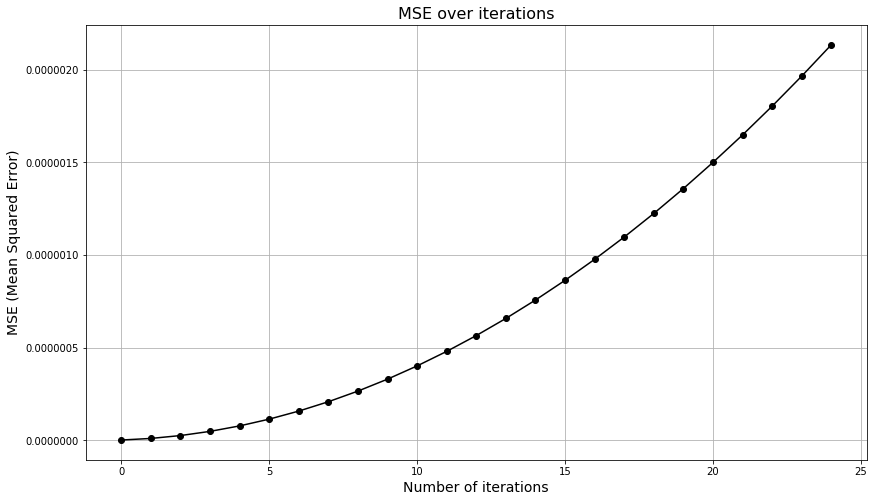

In [8]:
# Plot the error over iterations.
plt.figure(figsize=(14,8))
plt.plot(np.arange(0,len(MSE)),MSE,'-o',c='k')
plt.title('MSE over iterations',fontsize=16)
plt.xlabel('Number of iterations',fontsize=14)
plt.ylabel('MSE (Mean Squared Error)',fontsize=14)
plt.grid()
plt.show()
plt.close()

**Question**: *How much time is needed to run a single iteration?* Approximately 2 seconds per iteration on our computer (at home).

**Question**: *Have you obtained similar/identical results as in the previous task? What might be the source of eventual differences?* When comparing the results of this alternate PageRank algorithm with the results from the sparse.ipynb it becomes clear that the matrix multiplications are much faster than the triple for loop of the alternate PageRank method. Even though it only takes 2 seconds per iteration, this method will take substantially longer as the size of the dataset increases. Interestingly, after a single iteration the MSE of the alternate PageRank is incredibly close to 0. Strangely the MSE increases over time.